# <a>Project 4 - Unsupervised Learning (PCA)</a>

## Let's Data - Data Science Journey

*By Reginaldo Jr - <a>reginaldojr@yahoo.com</a>*

### Imports and Configurations

In [75]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings

from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

sns.set_style("darkgrid")

warnings.filterwarnings("ignore")

### Data

In [76]:
df = pd.read_csv("microvan.csv")
df.head()

,subjnumb,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
0,1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
1,2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
2,3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
3,4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
4,5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


In [77]:
df.columns

Index(['subjnumb', 'mvliking', 'kidtrans', 'miniboxy', 'lthrbetr', 'secbiggr',
       'safeimpt', 'buyhghnd', 'pricqual', 'prmsound', 'perfimpt', 'tkvacatn',
       'noparkrm', 'homlrgst', 'envrminr', 'needbetw', 'suvcmpct', 'next2str',
       'carefmny', 'shdcarpl', 'imprtapp', 'lk4whldr', 'kidsbulk', 'wntguzlr',
       'nordtrps', 'stylclth', 'strngwrn', 'passnimp', 'twoincom', 'nohummer',
       'aftrschl', 'accesfun', 'age', 'income', 'miles', 'numkids', 'female',
       'educ', 'recycle'],
      dtype='object')

In [78]:
df = df.set_index("subjnumb")
df.head()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
subjnumb,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


In [79]:
df.shape

(400, 38)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   mvliking  400 non-null    int64
 1   kidtrans  400 non-null    int64
 2   miniboxy  400 non-null    int64
 3   lthrbetr  400 non-null    int64
 4   secbiggr  400 non-null    int64
 5   safeimpt  400 non-null    int64
 6   buyhghnd  400 non-null    int64
 7   pricqual  400 non-null    int64
 8   prmsound  400 non-null    int64
 9   perfimpt  400 non-null    int64
 10  tkvacatn  400 non-null    int64
 11  noparkrm  400 non-null    int64
 12  homlrgst  400 non-null    int64
 13  envrminr  400 non-null    int64
 14  needbetw  400 non-null    int64
 15  suvcmpct  400 non-null    int64
 16  next2str  400 non-null    int64
 17  carefmny  400 non-null    int64
 18  shdcarpl  400 non-null    int64
 19  imprtapp  400 non-null    int64
 20  lk4whldr  400 non-null    int64
 21  kidsbulk  400 non-null    int64
 22  wntguzl

In [81]:
dicionario_dados = dict()

dicionario_dados['kidtrans'] = 'Precisamos de um carro que ajude a transportar nossos filhos os seus amigos'
dicionario_dados['miniboxy'] = 'As minivans atuais são simplesmente muito quadradas e grandes'
dicionario_dados['lthrbetr'] = 'Os assentos de couro são muito melhores que os de tecido'
dicionario_dados['secbiggr'] = 'Se tivéssemos um segundo carro, precisaria ser maior que um sedã padrão'
dicionario_dados['safeimpt'] = 'A segurança do automóvel é muito importante para mim'
dicionario_dados['buyhghnd'] = 'Nós tendemos a comprar carros mais sofisticados'
dicionario_dados['pricqual'] = 'Os preços dos automóveis refletem fortemente a qualidade de produção subjacente'
dicionario_dados['prmsound'] = 'Um sistema de som e entretenimento premium ajuda em longas viagens de carro'
dicionario_dados['perfimpt'] = 'O desempenho é muito importante em um carro'
dicionario_dados['tkvacatn'] = 'Tentamos tirar o máximo de férias possível'
dicionario_dados['noparkrm'] = 'Nossa residência atual não tem muito espaço de estacionamento'
dicionario_dados['homlrgst'] = 'Nossa casa está entre as maiores do bairro'
dicionario_dados['envrminr'] = 'O impacto ambiental dos automóveis é relativamente pequeno'
dicionario_dados['needbetw'] = 'Precisa haver algo entre um sedan e uma minivan'
dicionario_dados['suvcmpct'] = 'Gosto mais de SUVs do que de minivans, pois são mais compactos'
dicionario_dados['next2str'] = 'Meu próximo carro será um de dois lugares'
dicionario_dados['carefmny'] = 'Temos cuidado com o dinheiro'
dicionario_dados['shdcarpl'] = 'Acho que todo mundo deveria pegar carona ou usar transporte público'
dicionario_dados['imprtapp'] = 'A maioria dos nossos aparelhos são importados'
dicionario_dados['lk4whldr'] = 'A tração nas quatro rodas é uma opção muito atraente'
dicionario_dados['kidsbulk'] = 'Nossos filhos tendem a levar muitos itens volumosos e brinquedos com eles'
dicionario_dados['wntguzlr'] = 'Eu vou comprar o que eu quero mesmo que seja um “bebedor de gás”'
dicionario_dados['nordtrps'] = 'Não fazemos viagens com a família'
dicionario_dados['stylclth'] = 'Nós tendemos a comprar roupas elegantes para a família'
dicionario_dados['strngwrn'] = 'A proteção da garantia precisa ser forte em um carro novo'
dicionario_dados['passnimp'] = 'A paixão pelo trabalho é mais importante do que o pagamento'
dicionario_dados['twoincom'] = 'Nossa família acharia difícil subsistir com apenas uma renda'
dicionario_dados['nohummer'] = 'Não estou interessado em possuir um veículo como um Hummer'
dicionario_dados['aftrschl'] = 'Nós nos envolvemos em mais atividades depois da escola do que a maioria das famílias'
dicionario_dados['accesfun'] = 'Os acessórios realmente tornam o carro mais divertido de dirigir'
dicionario_dados['age'] = 'Idade do entrevistado em anos'
dicionario_dados['income'] = 'Renda familiar anual em milhares de dólares'
dicionario_dados['miles'] = 'Valor anual total conduzido por membros da família em milhares de milhas'
dicionario_dados['numkids'] = 'Número de crianças (0-18 anos) que residem no domicílio'
dicionario_dados['female'] = 'Se o entrevistado é ou não uma mulher'
dicionario_dados['educ'] = 'Nível de escolaridade do entrevistado (1 = Ensino médio, 2 = Alguma faculdade, 3 = Graduação, 4 = Pós-graduação)'
dicionario_dados['recycle'] = 'Reciclagem autorrelatada em comparação com a média (1 = Muito menos, 2 = Um pouco menos, 3 = Médio, 4 = Um pouco mais, 5 = Muito mais)'

In [82]:
dicionario_dados['educ']

'Nível de escolaridade do entrevistado (1 = Ensino médio, 2 = Alguma faculdade, 3 = Graduação, 4 = Pós-graduação)'

In [83]:
def getDataDict(columnName):
    return dicionario_dados[columnName]
getDataDict('suvcmpct')

'Gosto mais de SUVs do que de minivans, pois são mais compactos'

In [84]:
dataDict = gr.Interface(
    fn=getDataDict,
    inputs=gr.Dropdown(choices=sorted(dicionario_dados.keys()), label="Select yout choice..."),
    outputs="label",
)
dataDict.launch()

Running on local URL:  http://127.0.0.1:7867

To create a public link, set `share=True` in `launch()`.


### EDA

In [85]:
df.describe()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,4.84,4.83,4.67,4.25,5.23,5.00,5.28,4.96,4.72,5.00,4.44,4.58,5.49,5.53,4.94,4.78,4.49,5.22,5.17,4.56,5.24,4.48,5.06,5.32,5.34,5.04,5.62,4.87,4.85,4.38,4.64,40.05,71.28,18.04,1.22,0.54,2.81,3.04
std,2.69,1.52,1.48,1.52,1.51,1.51,1.54,1.52,1.51,1.49,1.53,1.52,1.50,1.52,1.55,1.51,1.55,1.53,1.50,1.50,1.46,1.48,1.51,1.49,1.53,1.50,1.51,1.56,1.54,1.51,1.52,8.57,43.28,4.86,1.08,0.50,0.93,1.18
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,19.00,15.00,7.00,0.00,0.00,1.00,1.00
25%,3.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.00,5.00,5.00,4.00,4.00,3.00,4.00,4.00,3.00,4.00,3.75,4.00,4.00,4.00,4.00,5.00,4.00,4.00,3.00,3.00,34.00,36.00,15.00,0.00,0.00,2.00,2.00
50%,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,6.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,6.00,5.00,5.00,4.00,5.00,40.00,62.50,18.00,1.00,1.00,3.00,3.00
75%,7.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,6.00,6.00,5.25,6.00,7.00,7.00,6.00,6.00,6.00,7.00,6.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,7.00,6.00,6.00,5.00,6.00,46.00,96.00,21.00,2.00,1.00,3.00,4.00
max,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,60.00,273.00,32.00,4.00,1.00,4.00,5.00


In [86]:
demo_cols = ['age', 'income', 'miles', 'numkids', 'female', 'mvliking','educ', 'recycle']
df[demo_cols].describe()

,age,income,miles,numkids,female,mvliking,educ,recycle
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,40.05,71.28,18.04,1.22,0.54,4.84,2.81,3.04
std,8.57,43.28,4.86,1.08,0.50,2.69,0.93,1.18
min,19.00,15.00,7.00,0.00,0.00,1.00,1.00,1.00
25%,34.00,36.00,15.00,0.00,0.00,3.00,2.00,2.00
50%,40.00,62.50,18.00,1.00,1.00,5.00,3.00,3.00
75%,46.00,96.00,21.00,2.00,1.00,7.00,3.00,4.00
max,60.00,273.00,32.00,4.00,1.00,9.00,4.00,5.00


### PCA

In [87]:
for i in range(1,10):
    pca = PCA(n_components=i, random_state=42).fit(df.drop(demo_cols,axis=1))
    print (f'{i} component(s): {sum(pca.explained_variance_ratio_)} - {pca.explained_variance_ratio_}')

1 component(s): 0.27696709879672465 - [0.2769671]
2 component(s): 0.4445767750017479 - [0.2769671  0.16760968]
3 component(s): 0.5459459552274878 - [0.2769671  0.16760968 0.10136918]
4 component(s): 0.634246449089425 - [0.2769671  0.16760968 0.10136918 0.08830049]
5 component(s): 0.69492092802917 - [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448]
6 component(s): 0.7163695796236547 - [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865]
7 component(s): 0.7356422840632021 - [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727 ]
8 component(s): 0.7538737884378812 - [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727  0.0182315 ]
9 component(s): 0.7715039823284864 - [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727  0.0182315  0.01763019]


In [88]:
n_components=6
pca = PCA(n_components=n_components, random_state=42).fit(df.drop(demo_cols,axis=1))
pca.components_

array([[-1.54242523e-01, -2.81775831e-02, -2.77771856e-01,
         1.31120032e-02, -6.55592685e-02, -2.48789125e-01,
        -1.87212012e-01, -2.57534039e-01,  2.75945850e-02,
        -2.88168029e-01, -3.63932100e-02, -1.62540808e-01,
         1.67796640e-01, -4.41662433e-02, -5.51359745e-02,
        -6.95906332e-02,  2.91928208e-01, -1.70653306e-01,
        -2.48765321e-01, -1.12947539e-01, -1.64018658e-01,
         2.12266322e-01,  1.33568970e-01, -2.56185238e-01,
        -1.38779086e-01,  2.71164567e-01, -1.99131255e-01,
        -1.99116260e-02, -1.48933645e-01, -2.85564500e-01],
       [ 1.09807865e-03, -3.64988114e-01,  8.12541567e-02,
        -3.38909225e-01, -2.18792400e-04, -8.27943891e-02,
         7.97252373e-02,  6.19192696e-03,  1.47139293e-02,
         1.17792436e-02, -3.61515356e-01,  2.99948345e-01,
         1.51018703e-02, -3.46323846e-01, -3.61913246e-01,
         3.38353633e-01,  6.73537198e-02,  1.41603682e-02,
         7.29399128e-03,  7.47233603e-03, -5.49026164e-

In [89]:
df_comp = pd.DataFrame(data=pca.components_, columns=df.drop(demo_cols,axis=1).columns)
df_comp

,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun
0,-0.15,-0.03,-0.28,0.01,-0.07,-0.25,-0.19,-0.26,0.03,-0.29,-0.04,-0.16,0.17,-0.04,-0.06,-0.07,0.29,-0.17,-0.25,-0.11,-0.16,0.21,0.13,-0.26,-0.14,0.27,-0.20,-0.02,-0.15,-0.29
1,0.00,-0.36,0.08,-0.34,-0.00,-0.08,0.08,0.01,0.01,0.01,-0.36,0.30,0.02,-0.35,-0.36,0.34,0.07,0.01,0.01,0.01,-0.01,-0.01,0.04,-0.11,0.13,0.01,-0.06,-0.32,0.05,0.01
2,0.37,-0.05,-0.04,0.01,0.30,-0.07,-0.10,-0.06,-0.31,-0.08,0.02,-0.04,0.27,-0.00,0.08,0.02,0.06,-0.23,0.05,0.22,0.29,0.23,-0.34,-0.11,0.20,-0.01,-0.08,0.05,0.37,-0.05
3,0.31,-0.07,0.03,0.04,-0.44,-0.06,-0.02,-0.01,0.42,0.04,-0.00,-0.00,0.11,-0.05,0.05,0.07,0.01,-0.13,-0.02,-0.42,0.25,0.05,-0.26,0.03,-0.34,-0.11,-0.08,-0.02,0.18,0.07
4,-0.13,0.03,0.08,-0.07,-0.03,0.30,0.42,0.08,0.08,-0.05,0.11,-0.07,0.41,0.02,-0.04,0.17,-0.09,-0.42,-0.07,-0.03,-0.12,0.29,0.16,-0.04,0.03,-0.03,0.39,0.03,-0.02,0.01
5,-0.04,-0.14,0.10,-0.30,-0.04,-0.10,-0.17,0.02,0.03,-0.08,0.10,0.06,0.13,-0.24,-0.02,0.12,-0.07,-0.01,0.12,-0.03,-0.10,-0.03,0.00,0.24,0.05,0.13,-0.07,0.78,-0.03,0.02


In [90]:
for i in range(len(df_comp)):
    print(df_comp.loc[i].max(), df_comp.loc[i].min())

0.29192820787561413 -0.2881680286409768
0.33835363301878085 -0.3649881137532546
0.3665407613907538 -0.3442915373005931
0.41713691281116577 -0.44377414255704034
0.41954349228728444 -0.4198873341779362
0.7836983593257963 -0.30329942113276975


In [91]:
for i in range(len(df_comp)):
    print(df_comp.columns[df_comp.loc[i].argmax()], df_comp.columns[df_comp.loc[i].argmin()])

carefmny tkvacatn
next2str miniboxy
aftrschl nordtrps
perfimpt safeimpt
pricqual shdcarpl
nohummer secbiggr


In [92]:
for i in range(len(df_comp)):
    print(f'{i}:',dicionario_dados[df_comp.columns[df_comp.loc[i].argmax()]]," - ", dicionario_dados[df_comp.columns[df_comp.loc[i].argmin()]])

0: Temos cuidado com o dinheiro  -  Tentamos tirar o máximo de férias possível
1: Meu próximo carro será um de dois lugares  -  As minivans atuais são simplesmente muito quadradas e grandes
2: Nós nos envolvemos em mais atividades depois da escola do que a maioria das famílias  -  Não fazemos viagens com a família
3: O desempenho é muito importante em um carro  -  A segurança do automóvel é muito importante para mim
4: Os preços dos automóveis refletem fortemente a qualidade de produção subjacente  -  Acho que todo mundo deveria pegar carona ou usar transporte público
5: Não estou interessado em possuir um veículo como um Hummer  -  Se tivéssemos um segundo carro, precisaria ser maior que um sedã padrão


<Axes: >

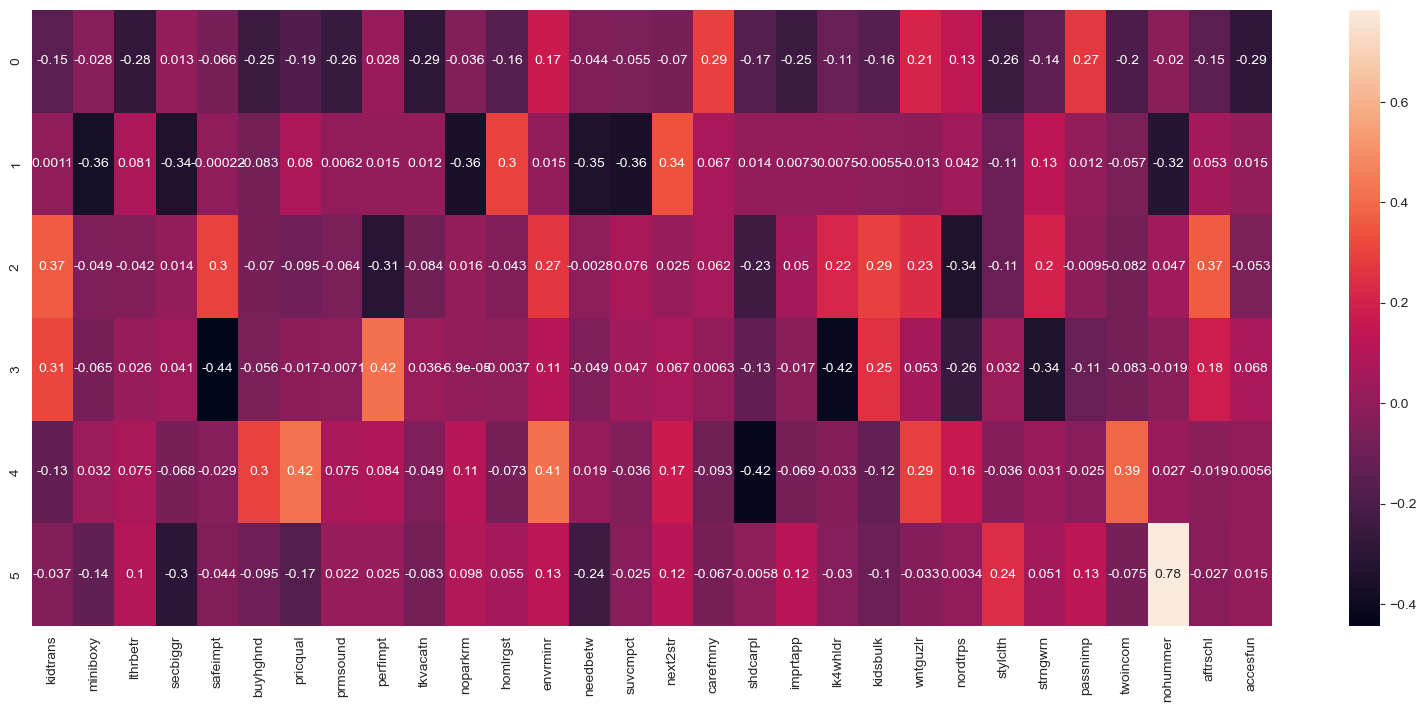

In [93]:
fig, graf = plt.subplots(1,1, figsize=(20,8))
sns.heatmap(data=df_comp, ax=graf, annot=True)

In [94]:
dataDict = gr.Interface(
    fn=getDataDict,
    inputs=gr.Dropdown(choices=sorted(dicionario_dados.keys()), label="Select yout choice..."),
    outputs="label",
)
dataDict.launch()

Running on local URL:  http://127.0.0.1:7868

To create a public link, set `share=True` in `launch()`.


In [95]:
pca.transform(df.drop(demo_cols,axis=1))

array([[ 4.95739724, -0.630778  ,  0.25397408,  4.53413096,  0.4787577 ,
         1.63151984],
       [-0.42529226, -4.57730748, -2.68257259, -2.62292284, -0.50422577,
         0.14660207],
       [-4.20223653,  5.99835902,  2.46455968,  1.54782301, -2.41202492,
        -1.06464918],
       ...,
       [-6.4115679 , -4.47822563, -6.6555251 , -0.29161379, -1.62472682,
        -1.36550858],
       [-3.57270499, -5.5292335 ,  0.25267482,  2.61167859, -1.04362801,
         0.1063075 ],
       [ 4.05034892,  2.45977589,  3.75878157, -0.49039215,  0.74268315,
         0.5523358 ]])

In [96]:
df2 = pd.concat([df[demo_cols],pd.DataFrame(data=pca.transform(df.drop(demo_cols,axis=1)), columns=["pca_comp"+str(i) for i in range(n_components)], index=df.index)], axis=1)
df2.head()

,age,income,miles,numkids,female,mvliking,educ,recycle,pca_comp0,pca_comp1,pca_comp2,pca_comp3,pca_comp4,pca_comp5
subjnumb,,,,,,,,,,,,,,
1,34,59,14,1,0,4,1,3,4.96,-0.63,0.25,4.53,0.48,1.63
2,36,79,16,1,0,6,3,4,-0.43,-4.58,-2.68,-2.62,-0.50,0.15
3,51,72,22,2,1,3,3,3,-4.20,6.00,2.46,1.55,-2.41,-1.06
4,32,42,12,0,0,3,3,2,4.89,-0.93,-0.76,-3.58,3.52,-2.16
5,40,75,17,1,1,1,3,4,0.12,5.55,-1.02,0.07,-0.84,-0.26
